# Problem 1: Clustering

Customer segmentation merupakan kegiatan memisahkan pelanggan ke dalam kelompok-kelompok yang mencerminkan kesamaan di antara pelanggan di setiap cluster. Pemilik toko ingin membagi pelanggan menjadi beberapa segmen untuk mengoptimalkan minat setiap pelanggan bagi bisnis dan kemudian memodifikasi produk sesuai dengan kebutuhan dan perilaku pelanggan yang berbeda. Hal ini juga membantu bisnis untuk memenuhi kekhawatiran berbagai jenis pelanggan. Dalam proyek ini, kita perlu melakukan pengelompokan data dengan unsupervised learning pada record pelanggan dari data perusahaan bahan makanan (https://drive.google.com/file/d/11mmwgxWwnfF3PUhsELG8NkbpWeFHZoUW/view) dan menjawab pertanyaan dengan petunjuk berikut.

---

## Import Libraries

---

In [64]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

## Load Dataset

---

In [2]:
df = pd.read_csv('dataset/marketing_campaign.csv', sep='\t')

### a.	Load dataset dan tampilkan 10 data pertama.

In [3]:
df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,...,20,1,0,0,0,0,0,3,11,0


## Data Preprocessing

---

### b.	Menggunakan library pandas, dapatkan informasi fitur data, sehingga kita memahami langkah apa yang harus kita ambil untuk membersihkan dataset. (gunakan: info())
- Apakah ada missing values?
- Apakah ada categorical features?
- Apa yang harus kita lakukan jika ada beberapa categorical features?

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Menggunakan fungsi `info` kita dapat menyimpulkan bahwa:
- Terdapat 3 *categorical features* dan 26 *numerical features*
- Terdapat missing values pada kolom `income`

Encoding fitur kategorikal: Karena sebagian besar algoritma pembelajaran mesin tidak dapat bekerja langsung dengan fitur-fitur kategorikal, kita perlu mengubahnya menjadi representasi numerik. Ada beberapa metode encoding yang umum digunakan, antara lain:

- One-Hot Encoding: Mengubah setiap nilai kategori menjadi vektor biner, di mana setiap vektor memiliki panjang yang sama dengan jumlah kategori unik dalam fitur tersebut.
- Label Encoding: Mengganti setiap nilai kategori dengan bilangan bulat unik. Metode ini cocok untuk fitur-fitur yang memiliki urutan implisit di antara nilai-nilainya.
- Ordinal Encoding: Mengganti setiap nilai kategori dengan bilangan bulat berdasarkan urutan tertentu yang ditentukan sebelumnya. Metode ini cocok untuk fitur-fitur yang memiliki urutan eksplisit di antara nilai-nilainya.

### c.	Lakukan pembersihan data (data cleaning) dengan menghapus baris yang memiliki missing values.

In [5]:
# delete rows with missing values
df1 = df.dropna().copy()

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   i

### d.	Lakukan langkah-langkah berikut untuk merekayasa beberapa fitur baru (feature engineering):

#### Buatlah fitur "Customer_For" yang menunjukkan jumlah hari pelanggan mulai berbelanja di toko terhadap tanggal terakhir yang tercatat (pelanggan terbaru dalam catatan). Gunakan fitur "Dt_Customer" yang menunjukkan jumlah hari seorang pelanggan terdaftar di database perusahaan.

In [12]:
# convert Dt_Customer to datetime
df1['Dt_Customer'] = pd.to_datetime(df1['Dt_Customer'], dayfirst=True)

In [17]:
most_recent_date = df1['Dt_Customer'].max()
df1['Customer_For'] = (most_recent_date - df1['Dt_Customer']).dt.days

In [18]:
df1['Customer_For']

0       663
1       113
2       312
3       139
4       161
       ... 
2235    381
2236     19
2237    155
2238    156
2239    622
Name: Customer_For, Length: 2216, dtype: int64

#### Ekstrak fitur "Age"  pelanggan berdasarkan "Year_Birth" yang menunjukkan tahun lahir orang yang bersangkutan.

In [19]:
df1['Year_Birth']

0       1957
1       1954
2       1965
3       1984
4       1981
        ... 
2235    1967
2236    1946
2237    1981
2238    1956
2239    1954
Name: Year_Birth, Length: 2216, dtype: int64

In [24]:
# calculate age of customer
df1['Age'] = most_recent_date.year - df1['Year_Birth']
df1['Age']

0       57
1       60
2       49
3       30
4       33
        ..
2235    47
2236    68
2237    33
2238    58
2239    60
Name: Age, Length: 2216, dtype: int64

#### Buat fitur lain "Spent" yang menunjukkan jumlah total yang dibelanjakan oleh pelanggan dalam berbagai kategori selama rentang waktu dua tahun.

Kolom yang menunjukan pengeluaran:
- MntFishProducts - amount spent on fish products in the last 2 years
- MntMeatProducts - amount spent on meat products in the last 2 years
- MntFruits - amount spent on fruits products in the last 2 years
- MntSweetProducts - amount spent on sweet products in the last 2 years
- MntWines - amount spent on wine products in the last 2 years
- MntGoldProds - amount spent on gold products in the last 2 years

In [25]:
df1['Spent'] = df1['MntFishProducts'] + df1['MntMeatProducts'] + df1['MntSweetProducts'] + df1['MntFruits'] + df1['MntWines'] + df1['MntGoldProds']
df1['Spent']

0       1617
1         27
2        776
3         53
4        422
        ... 
2235    1341
2236     444
2237    1241
2238     843
2239     172
Name: Spent, Length: 2216, dtype: int64

#### Buat fitur lain "Living_With" dari "Marital_Status" untuk mengekstrak situasi kehidupan pasangan.

Marital_Status dibagi menjadi 2 kategori:
- Single
- Couple

In [29]:
df1['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [30]:
category_mapping = {
    'Single': 'Single',
    'Together': 'Couple',
    'Married': 'Couple',
    'Divorced': 'Single',
    'Widow': 'Single',
    'Alone': 'Single',
    'Absurd': 'Single',
    'YOLO': 'Single'
}

In [31]:
df1['Living_With'] = df1['Marital_Status'].map(category_mapping)
df1['Living_With']

0       Single
1       Single
2       Couple
3       Couple
4       Couple
         ...  
2235    Couple
2236    Couple
2237    Single
2238    Couple
2239    Couple
Name: Living_With, Length: 2216, dtype: object

#### Buat fitur "Children" untuk menunjukkan jumlah anak dalam sebuah rumah tangga yaitu, anak-anak (kids) dan remaja (teenagers).

In [34]:
df1['Children'] = df1['Kidhome'] + df1['Teenhome']
df1['Children']

0       0
1       2
2       0
3       1
4       1
       ..
2235    1
2236    3
2237    0
2238    1
2239    2
Name: Children, Length: 2216, dtype: int64

#### Untuk mendapatkan kejelasan lebih lanjut tentang rumah tangga, buatlah fitur yang menunjukkan "Family_Size"

In [36]:
df1['Family_Size'] = df1['Children'] + df1['Living_With'].map({'Single': 1, 'Couple': 2})
df1['Family_Size']

0       1
1       3
2       2
3       3
4       3
       ..
2235    3
2236    5
2237    1
2238    3
2239    4
Name: Family_Size, Length: 2216, dtype: int64

#### Buat fitur "Is_Parent" untuk menunjukkan status orang tua

In [37]:
df1['Is_Parent'] = df1['Children'].map(lambda x: 1 if x > 0 else 0)
df1['Is_Parent']

0       0
1       1
2       0
3       1
4       1
       ..
2235    1
2236    1
2237    0
2238    1
2239    1
Name: Is_Parent, Length: 2216, dtype: int64

#### Buatlah tiga kategori dalam "Education" dengan menyederhanakan hitungan nilainya.

In [40]:
df1['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [41]:
category_mapping = {
    'Graduation': 'Bachelor\'s Degree',
    'PhD': 'Advanced Degree',
    'Master': 'Advanced Degree',
    'Basic': 'High School or Below',
    '2n Cycle': 'High School or Below'
}

In [42]:
df1['EducationC'] = df1['Education'].map(category_mapping)
df1['EducationC']

0       Bachelor's Degree
1       Bachelor's Degree
2       Bachelor's Degree
3       Bachelor's Degree
4         Advanced Degree
              ...        
2235    Bachelor's Degree
2236      Advanced Degree
2237    Bachelor's Degree
2238      Advanced Degree
2239      Advanced Degree
Name: EducationC, Length: 2216, dtype: object

#### Hapus beberapa fitur yang berulang (redundant features)

Fitur yang redundant:
- MntFishProducts
- MntMeatProducts
- MntFruits
- MntSweetProducts
- MntWines
- MntGoldProds
- Year_Birth
- Dt_Customer
- Marital_Status
- Kidhome
- Teenhome
- Education

In [53]:
df2 = df1.copy()

In [54]:
df2.drop(['ID', 'Year_Birth', 'Dt_Customer', 'Kidhome', 'Teenhome', 'MntFishProducts', 'MntMeatProducts', 'MntSweetProducts', 'MntFruits', 'MntWines', 'MntGoldProds', 'Marital_Status', 'Education'], axis='columns', inplace=True)

In [55]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Income               2216 non-null   float64
 1   Recency              2216 non-null   int64  
 2   NumDealsPurchases    2216 non-null   int64  
 3   NumWebPurchases      2216 non-null   int64  
 4   NumCatalogPurchases  2216 non-null   int64  
 5   NumStorePurchases    2216 non-null   int64  
 6   NumWebVisitsMonth    2216 non-null   int64  
 7   AcceptedCmp3         2216 non-null   int64  
 8   AcceptedCmp4         2216 non-null   int64  
 9   AcceptedCmp5         2216 non-null   int64  
 10  AcceptedCmp1         2216 non-null   int64  
 11  AcceptedCmp2         2216 non-null   int64  
 12  Complain             2216 non-null   int64  
 13  Z_CostContact        2216 non-null   int64  
 14  Z_Revenue            2216 non-null   int64  
 15  Response             2216 non-null   i

### e.	Analisis statistik deskriptif dari data menggunakan library pandas (gunakan: describe())

In [56]:
df2.describe()

,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,...,Complain,Z_CostContact,Z_Revenue,Response,Customer_For,Age,Spent,Children,Family_Size,Is_Parent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.0,2216.0,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,49.012635,2.323556,4.085289,2.671029,5.800993,5.319043,0.073556,0.074007,0.073105,...,0.009477,3.0,11.0,0.150271,353.521209,45.179603,607.075361,0.947202,2.592509,0.714350
std,25173.076661,28.948352,1.923716,2.740951,2.926734,3.250785,2.425359,0.261106,0.261842,0.260367,...,0.096907,0.0,0.0,0.357417,202.434667,11.985554,602.900476,0.749062,0.905722,0.451825
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,3.0,11.0,0.000000,0.000000,18.000000,5.000000,0.000000,1.000000,0.000000
25%,35303.000000,24.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,...,0.000000,3.0,11.0,0.000000,180.000000,37.000000,69.000000,0.000000,2.000000,0.000000
50%,51381.500000,49.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,...,0.000000,3.0,11.0,0.000000,355.500000,44.000000,396.500000,1.000000,3.000000,1.000000
75%,68522.000000,74.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,...,0.000000,3.0,11.0,0.000000,529.000000,55.000000,1048.000000,1.000000,3.000000,1.000000
max,666666.000000,99.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,...,1.000000,3.0,11.0,1.000000,699.000000,121.000000,2525.000000,3.000000,5.000000,1.000000


### f.	Buatlah grafik (plot) dari beberapa fitur yang dipilih ("Income", "Recency", "Customer_For", "Age", "Spent", "Is_Parent") untuk melihat outlier dalam data menggunakan library seaborn

Terdapat outlier pada fitur `Income`, `Age`, `Spent`

In [60]:
# select features
features = df2[['Income', 'Recency', 'Customer_For', 'Age', 'Spent', 'Is_Parent']].copy()

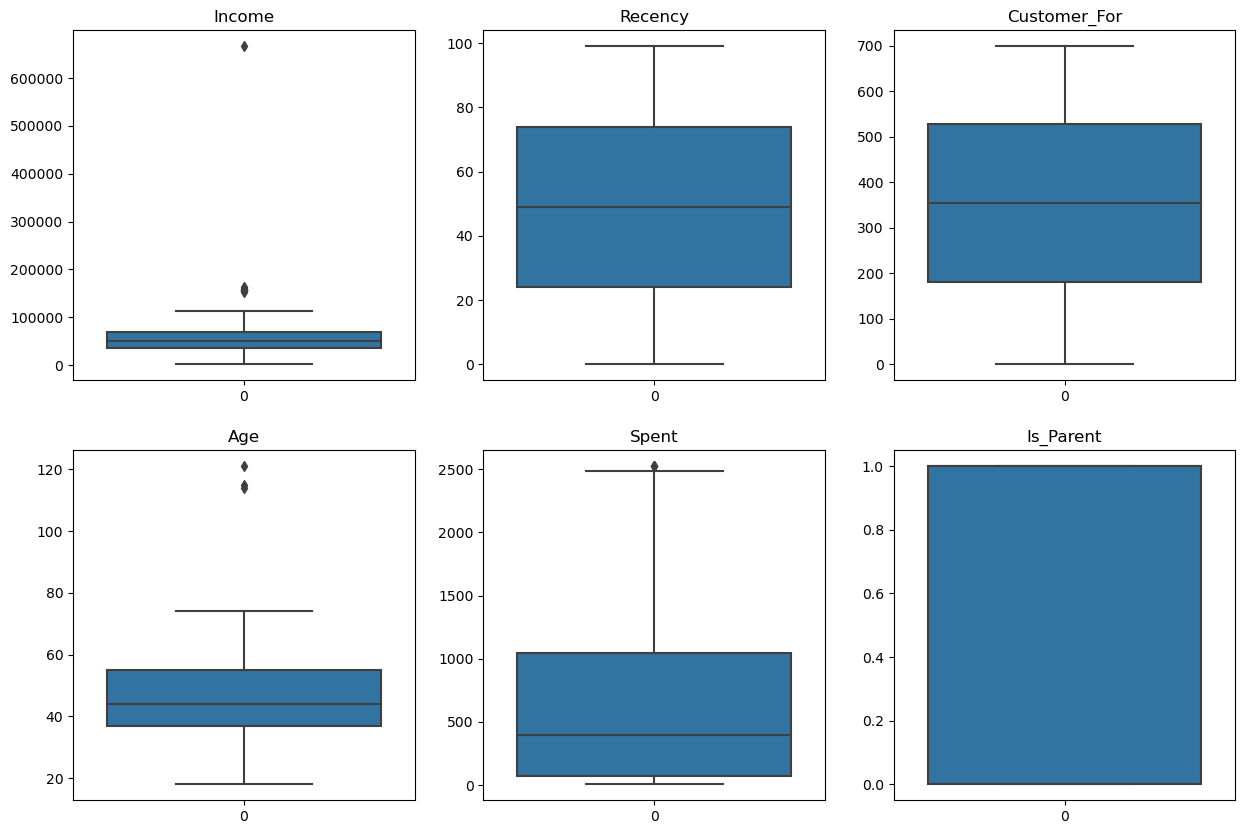

In [70]:
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(15, 10))

for i, col in enumerate(features.columns):
    ax[i//3, i%3].set_title(col)
    sns.boxplot(features[col], ax=ax[i//3, i%3])